# Prize-Collecting Steiner Tree (PCSTP)

## Libs Importing

In [1]:
import sys
import os
import time
import networkx as nx
from typing import Tuple, Set

sys.path.insert(1, os.path.realpath(os.path.pardir))

In [2]:
from pcstp.instances.generator import generate_random_steiner
from pcstp.utils.draw import draw_steiner_graph

## Experiments

In [3]:
G, (nodes, edges, position_matrix, edges_cost, terminals, prizes) = generate_random_steiner(
    num_nodes=25,
    num_edges=20,
    max_node_degree=10,
    min_prize=0,
    max_prize=100,
    num_terminals=5,
    min_edge_cost=0,
    max_edge_cost=10,
    cost_as_length=False,
    max_iter=100,
    seed=11
)

terminals:  (5,)
prizes:  (5,)


In [4]:
from pcstp.steinertree import SteinerTreeProblem
from pcstp.instances.reader import SteinlibReader, DatReader
from pcstp.solver.base import computes_steiner_cost

The instance can be imported from a file or generated through the instance generator presented above.

In [6]:
stp_reader = SteinlibReader()
stp = stp_reader.parser(filename='../data/instances/stp/C01-A.stp')

AttributeError: 'list' object has no attribute 'add'

In [ ]:
stp = SteinerTreeProblem(graph=G, terminals=terminals)

In [ ]:
from pcstp.solver.base import computes_steiner_cost

In [ ]:
from pcstp.utils.graph import preprocessing

In [ ]:
G, terminals = preprocessing(stp.graph, stp.terminals)

Iteration: 1 - Removing nodes: [294, 458, 327, 368, 402, 382, 410, 109, 107, 330, 434, 60, 210, 151, 289, 40, 91, 403, 474, 227, 404, 201, 64, 65, 299, 360, 264, 459, 154, 216, 110, 430, 488, 50, 471, 12, 477, 118, 78, 63, 308, 188, 408, 37, 448, 239, 377, 433, 191, 311, 268, 261, 320, 371, 53, 455, 8, 466, 362, 394, 300, 316, 102, 49, 399, 325, 469, 262, 345, 211, 117, 415, 461, 140, 7, 483, 265, 225, 484, 228, 290, 108, 339, 428, 15, 100, 447, 5, 353, 199, 25, 130, 442, 66, 203, 475, 75, 185, 165, 314, 219, 490, 367, 391, 427, 36, 215, 212, 251, 260, 285, 281, 350, 332, 181, 28, 180, 352, 450, 344, 213, 298, 76, 286, 296, 321, 24, 326, 187, 195, 492, 74, 80, 233, 336, 301, 256, 366, 18, 47, 274, 303, 291]
Iteration: 2 - Removing nodes: [282, 462, 424, 146, 149, 378, 409, 287, 413, 182, 340, 232, 189, 234, 248, 275, 193, 436, 324, 156, 133, 331, 145, 445, 115, 255, 92, 217, 472, 62, 356, 106, 498, 220]
Iteration: 3 - Removing nodes: [148, 113, 162, 124, 26, 467, 429, 95, 22, 273, 94]


In [ ]:
stp_preprocessed = SteinerTreeProblem(graph=G, terminals=terminals)

In [ ]:
stp.terminals

{13, 128, 164, 243, 499}

## Solution obtained with NetworkX Steiner Tree Approximation Algorithm

In [ ]:
start_time = time.time()

nx_steiner_tree = nx.algorithms.approximation.steinertree.steiner_tree(
    stp_preprocessed.graph,
    stp_preprocessed.terminals,
    weight='cost'
)

networkx_duration = time.time() - start_time
networkx_cost = computes_steiner_cost(G, nx_steiner_tree, terminals)
print(f'Cost: {networkx_cost}')


KeyError: (127, 128)

In [ ]:
print(f'Duration: {networkx_duration*1000} ms')

Duration: 1.1153221130371094 ms


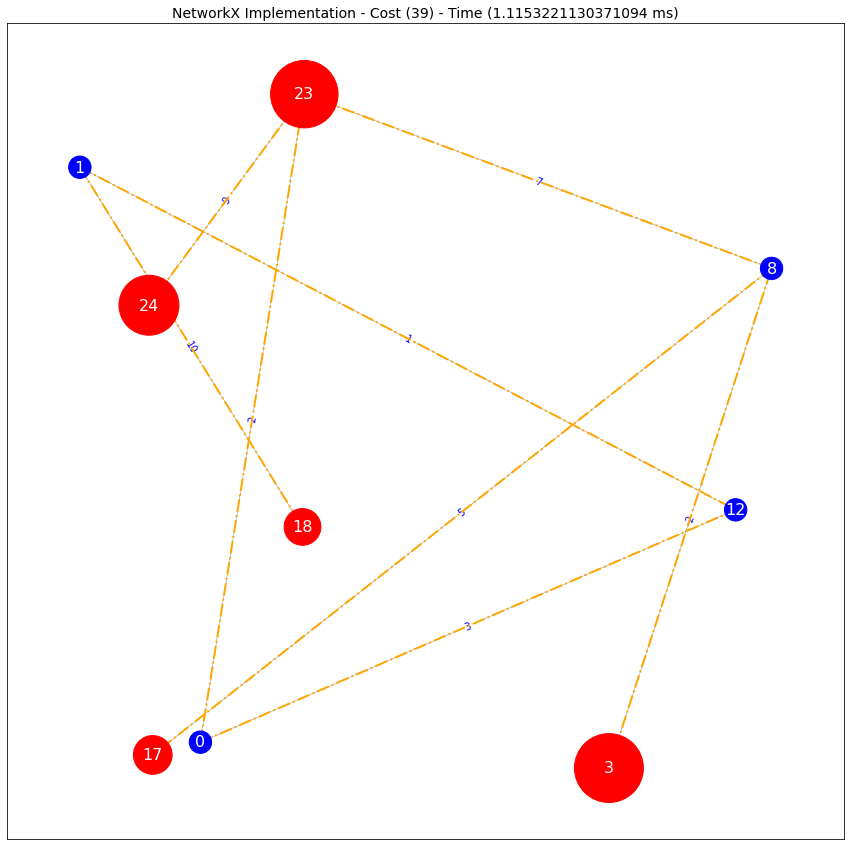

In [ ]:
draw_steiner_graph(
    stp_preprocessed.graph,
    steiner_graph=nx_steiner_tree,
    plot_title=f'NetworkX Implementation - Cost ({networkx_cost}) - Time ({networkx_duration * 1000} ms)',
    node_label='name'
)


## Solution obtained with Ant Colony Optimization

In [ ]:
from pcstp.solver.aco import AntColony

In [ ]:
list(stp_preprocessed.graph.neighbors(24))

[23]

In [ ]:
# %%timeit -n 100

solver = AntColony(stp_preprocessed.graph, stp_preprocessed.terminals, iterations=1, num_ants=1, log_level='debug')
steiner_tree, greedy_cost = solver.solve()


2022-01-23 11:22:04,080 - [aco.py:81] - DEBUG - Initializing ants...
2022-01-23 11:22:04,083 - [aco.py:86] - DEBUG - Initializing pheromones (strategy: same_value)...


TypeError: 'set' object is not subscriptable

In [ ]:
print(f'Cost: {solver.steiner_cost}')

Cost: 39


In [ ]:
steiner_tree.nodes

NodeView((3, 8, 17, 18, 1, 12, 0, 23, 24))